In [0]:
import numpy as np
import pandas as pd


In [0]:

import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

Reading the Datasets

In [0]:
category_df = pd.read_csv('/content/category.csv')
item_df = pd.read_csv('/content/items.csv')
events_df = pd.read_csv('/content/events 100k (1).csv')

In [0]:
category_df = pd.read_csv('item2_merging.csv')

In [41]:
category_df.shape

(499999, 4)

In [44]:
category_df.head

<bound method NDFrame.head of                  timestamp  ...                                        value
0      2015-08-23 03:20:00  ...                1141052 n48.000 140719 553394
1      2015-05-10 03:53:20  ...                                         1607
2      2015-06-07 04:06:40  ...                                       496949
3      2015-05-17 02:33:20  ...                                   n98880.000
4      2015-06-28 02:53:20  ...  798976 n7680.000 824508 45579 844667 999696
...                    ...  ...                                          ...
499994 2015-05-31 02:40:00  ...                                   n17196.000
499995 2015-07-05 04:20:00  ...                              n324.000 396934
499996 2015-08-02 01:46:40  ...          664227 1305534 664227 463202 664227
499997 2015-05-24 04:00:00  ...                                      1230384
499998 2015-06-28 02:53:20  ...                                       159862

[499999 rows x 4 columns]>

In [0]:
category_df.to_csv('item2_merging_timestamp.csv')

In [7]:
type(category_df['timestamp'])

pandas.core.series.Series

In [0]:
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 05:02:12,257597,view,355908,NaN
1,2015-06-02 05:50:14,992329,view,248676,NaN
2,2015-06-02 05:13:19,111016,view,318965,NaN
3,2015-06-02 05:12:35,483717,view,253185,NaN
4,2015-06-02 05:02:17,951259,view,367447,NaN


In [0]:
events_df.to_csv('events.csv')

In [0]:
item_properties_1_df.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


**Concatenating item_properties_1_df and item_properties_2_df**

In [0]:
items = pd.concat([item_properties_1_df, item_properties_2_df])

In [0]:
items.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429.0,categoryid,1338
1,1441508400000,206783.0,888,1116713 960601 n277.200
2,1439089200000,395014.0,400,n552.000 639502 n720.000 424566
3,1431226800000,59481.0,790,n15360.000
4,1431831600000,156781.0,917,828513
5,1436065200000,285026.0,available,0
6,1434250800000,89534.0,213,1121373
7,1431831600000,264312.0,6,319724
8,1433646000000,229370.0,202,1330310
9,1434250800000,98113.0,451,1141052 n48.000


In [0]:
items.shape

(11426586, 4)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

**Changing the timestamp under Items and Events **

In [0]:
from datetime import datetime

In [0]:
import datetime
times=[]
for i in items['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0))
    

In [0]:
items['timestamp']=times

In [0]:
items.head()

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513


In [0]:
year = items['timestamp']

In [0]:
items.head(10)

,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
1,2015-09-06 03:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 03:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 03:00:00,59481,790,n15360.000
4,2015-05-17 03:00:00,156781,917,828513
5,2015-07-05 03:00:00,285026,available,0
6,2015-06-14 03:00:00,89534,213,1121373
7,2015-05-17 03:00:00,264312,6,319724
8,2015-06-07 03:00:00,229370,202,1330310
9,2015-06-14 03:00:00,98113,451,1141052 n48.000


**Slicing each dataset to 50000 rows**

In [0]:
category_item_timestamp = category_item_timestamp.head(50000)

In [0]:
category_item_timestamp.to_csv('category_item_timestamp_1.csv')

In [0]:
category_item_timestamp = category_item_timestamp.head(50000)

In [0]:
category_item_timestamp.to_csv('category_item_timestamp_1.csv')

**Customers who bought something(but not sure if he repeated)Assume for now that the 11,719 visitors are unique and made at least a single purchase**

In [0]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
customer_purchased.size

11719

**Count of Unique visitor IDs**

In [0]:
all_customers = events_df.visitorid.unique()
all_customers.size

1407580

**Customer with Ids who bought something**

In [0]:
customer_browsed = [x for x in all_customers if x not in customer_purchased]

In [0]:
len(customer_browsed)

1395861

**Visitor ID - 992329 and their purchase history**

In [0]:
items_new = items.loc[items.property.isin(['categoryid', 'available']), :]
print("items with categoryid and available as propery:", items_new.size)
items_new.head(20)

items with categoryid and available as propery: 5161500


,timestamp,itemid,property,value
0,2015-06-28 03:00:00,460429,categoryid,1338
5,2015-07-05 03:00:00,285026,available,0
15,2015-07-19 03:00:00,186518,available,0
79,2015-06-07 03:00:00,423682,available,0
82,2015-06-14 03:00:00,316253,available,1
96,2015-07-19 03:00:00,430459,available,0
101,2015-05-31 03:00:00,411262,available,0
116,2015-09-06 03:00:00,50372,available,0
119,2015-09-06 03:00:00,289043,available,0
133,2015-06-28 03:00:00,365407,available,0


In [0]:
events_df[events_df.visitorid == 992329].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
1492085,2015-05-05 05:06:24,992329,view,2711,NaN
1981137,2015-05-28 02:57:28,992329,view,340825,NaN
1972814,2015-05-28 03:05:22,992329,view,446522,NaN
1,2015-06-02 05:50:14,992329,view,248676,NaN
20559,2015-06-02 05:57:52,992329,view,193150,NaN
44215,2015-06-02 06:12:35,992329,view,246453,NaN
67693,2015-06-04 05:18:07,992329,view,8775,NaN
50030,2015-06-04 05:19:18,992329,view,8775,NaN
64989,2015-06-04 05:20:05,992329,view,8775,NaN
92903,2015-06-05 04:55:49,992329,view,437767,NaN


**Only 5 thousands of transactions repeated, rest 22457 were different so, Market basket analysis would not be so perfect**

In [0]:
events_df["event"].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [0]:
print(events_df["transactionid"].dropna().unique().shape[0])

17672


In [0]:
print(events_df["transactionid"].dropna().shape[0])

22457


**Count of Actions and its plot**

addtocart      69332
transaction    22457
Name: event, dtype: int64


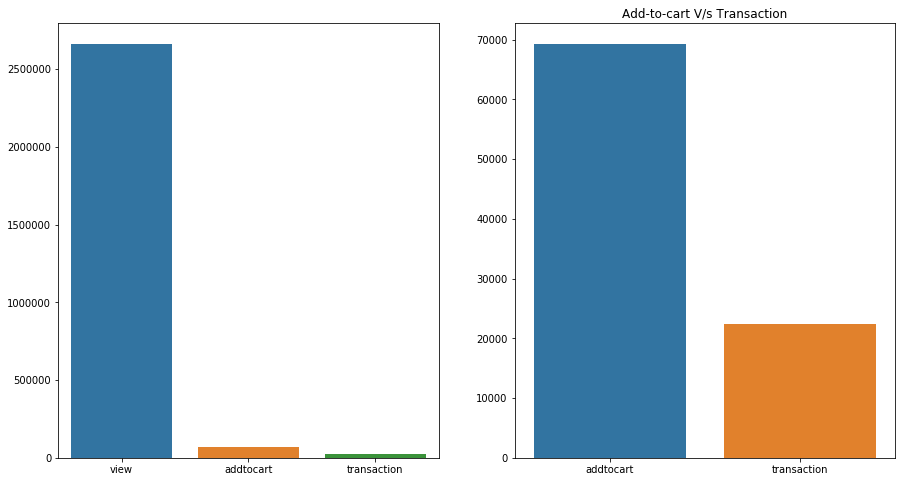

In [0]:
events_count=events_df["event"].value_counts()
fig, axs = plt.subplots(ncols=2,figsize=(15, 8))
sns.barplot(events_count.index, events_count.values, ax=axs[0])

events_count=events_df["event"].value_counts()[1:]
#plt.title('Actions Vs Count')
g=sns.barplot(events_count.index, events_count.values,ax=axs[1])
#g.set_yscale('log')
events_count=events_df["event"].value_counts()[1:]
plt.title('Add-to-cart V/s Transaction')
sns.barplot(events_count.index, events_count.values)

print(events_count)

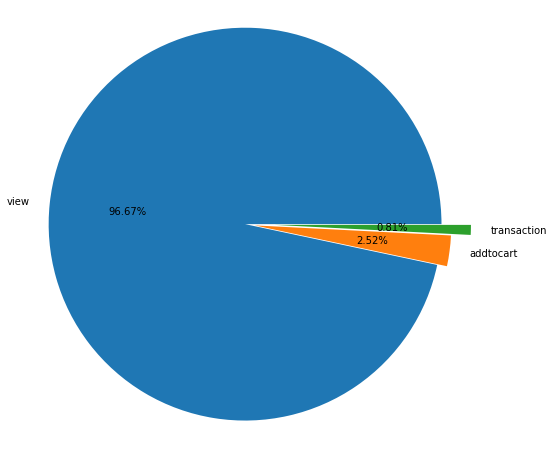

In [0]:
data = events_df.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.05, 0.15)
fig, ax = plt.subplots(figsize=(8,8))

patches, texts, autotexts = ax.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=False, startangle=0) 

ax.axis('equal')
plt.show()

**Number of times items appeared**

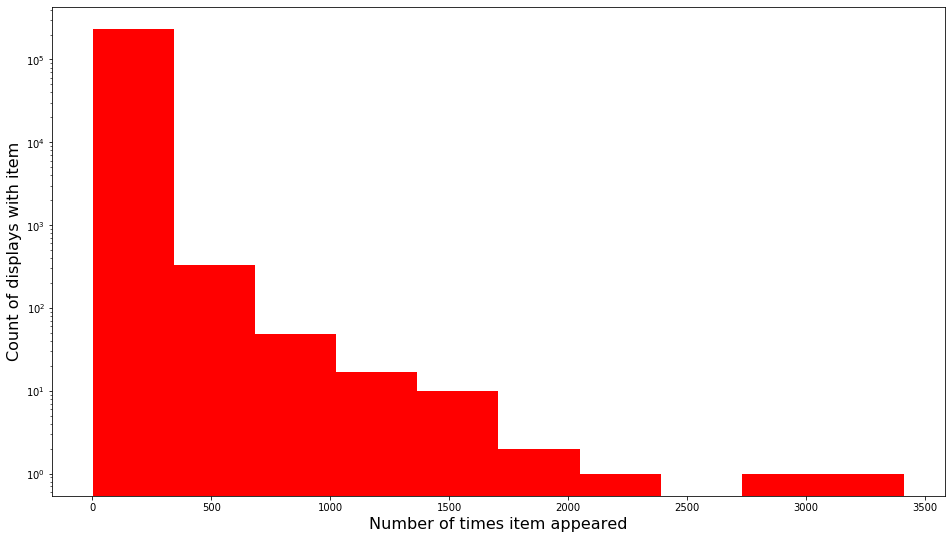

In [0]:
items = events_df.itemid.value_counts()
plt.figure(figsize=(16, 9))
plt.hist(items.values, bins=10, log=True,color='red')
plt.xlabel('Number of times item appeared', fontsize=16)
plt.ylabel('Count of displays with item', fontsize=16)
plt.show()